# Modeling

ha!

In [264]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

from pandas import HDFStore
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [364]:
hdf = HDFStore('data/preprocessed.h5')
training = hdf['training']
validation = hdf['validation']
testing = hdf['testing']
training.head(5)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status,hour
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.311892,0.294995,0.542070,1.169485,0.328604,0.227817,0.231535,0.239477,0.342527,0.210442,0.233514,0.818391,0.638974,-0.486065,0.619228,0.598585,0.519886,0.518055,0.611992,0.615632,0.604436,0.634531,0.626695,0.595971,0.687169,0.700104,-0.102550,-0.048481,0.235241,0.463171,-0.077744,0.027964,0.016093,0.251648,0.272891,-0.507132,-0.028209,-0.533382,-0.258957,0.461645,-0.506603,-0.313795,-0.153969,-0.108783,1.129201,0.442586,-0.386207,1.288397,1.330724,0.331637,NORMAL,0
2018-04-01 00:30:00,0.311892,0.589772,0.528128,1.073238,0.309929,0.131575,0.231535,0.239477,0.342527,0.210442,0.191741,0.829638,0.937675,-0.424807,0.621026,0.601003,0.514704,0.504153,0.611092,0.613606,0.602948,0.631288,0.627913,0.595764,0.686447,0.699387,-0.149239,-0.041370,0.231086,0.490736,-0.067737,0.040637,0.021575,0.332731,0.306946,-0.491812,-0.264342,-0.579691,-0.168756,0.275444,-0.452800,-0.252175,-0.269011,-0.410409,0.269839,0.047248,-0.427480,1.344654,1.165859,0.659977,NORMAL,0
2018-04-01 01:00:00,0.311892,-0.034464,0.528130,1.015488,0.325129,0.088377,0.331585,0.238158,0.323794,0.210442,0.098467,1.011602,0.896788,-0.456506,0.621666,0.601689,0.517423,0.509257,0.612667,0.615450,0.602243,0.635344,0.629815,0.594141,0.685178,0.698710,-0.112864,-0.044752,0.239355,0.460415,-0.113101,0.014707,0.019988,0.328984,0.305196,-0.475114,-0.077993,-0.116607,-0.284729,-0.076269,-0.304840,-0.252175,-0.345705,0.042030,0.413066,-0.185303,-0.427480,0.757619,1.279204,0.456179,NORMAL,1
2018-04-01 01:30:00,0.309903,0.321005,0.528128,1.015488,0.321221,0.159347,0.331585,0.239477,0.358137,0.211929,0.093213,0.811379,0.805812,-0.426147,0.619460,0.598694,0.517836,0.508581,0.608880,0.613889,0.603686,0.631689,0.627712,0.594472,0.685814,0.697878,-0.134176,-0.048217,0.226259,0.477872,-0.074408,0.014873,0.021398,0.318100,0.278353,-0.479989,0.722415,-0.139761,-0.226742,0.544401,-0.385545,-0.225766,-0.173143,0.946910,0.470356,0.047248,-0.386206,1.124515,1.444070,0.442027,NORMAL,1
2018-04-01 02:00:00,0.311892,0.529085,0.493276,0.938489,0.314272,0.177513,0.333058,0.239477,0.323794,0.210442,0.224592,0.993095,0.868487,-0.430463,0.621508,0.604157,0.520349,0.516152,0.610769,0.614867,0.603908,0.631387,0.626513,0.596276,0.685657,0.701073,-0.082527,-0.048483,0.223104,0.499005,-0.071073,0.054031,0.043153,0.279522,0.258676,-0.484676,0.559497,-0.000836,-0.323387,0.109932,-0.170330,-0.234569,-0.249837,-0.173417,0.012029,-0.115538,-0.592573,1.009556,1.763497,0.498637,NORMAL,2


In [79]:
xColumns = list(training.columns[training.columns.str.contains('sensor_')])
xColumns += ['hour']
yColumns = 'machine_status'

In [370]:
xTrain, yTrain = training[xColumns], training[yColumns]
xVal, yVal = validation[xColumns], validation[yColumns]
xTest, yTest = testing[xColumns], testing[yColumns]

In [374]:
xTest.shape

(2543, 51)

In [375]:
yTest.shape

(2543,)

In [342]:
xTrain.head(5)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,hour
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.311892,0.294995,0.542070,1.169485,0.328604,0.227817,0.231535,0.239477,0.342527,0.210442,0.233514,0.818391,0.638974,-0.486065,0.619228,0.598585,0.519886,0.518055,0.611992,0.615632,0.604436,0.634531,0.626695,0.595971,0.687169,0.700104,-0.102550,-0.048481,0.235241,0.463171,-0.077744,0.027964,0.016093,0.251648,0.272891,-0.507132,-0.028209,-0.533382,-0.258957,0.461645,-0.506603,-0.313795,-0.153969,-0.108783,1.129201,0.442586,-0.386207,1.288397,1.330724,0.331637,0
2018-04-01 00:30:00,0.311892,0.589772,0.528128,1.073238,0.309929,0.131575,0.231535,0.239477,0.342527,0.210442,0.191741,0.829638,0.937675,-0.424807,0.621026,0.601003,0.514704,0.504153,0.611092,0.613606,0.602948,0.631288,0.627913,0.595764,0.686447,0.699387,-0.149239,-0.041370,0.231086,0.490736,-0.067737,0.040637,0.021575,0.332731,0.306946,-0.491812,-0.264342,-0.579691,-0.168756,0.275444,-0.452800,-0.252175,-0.269011,-0.410409,0.269839,0.047248,-0.427480,1.344654,1.165859,0.659977,0
2018-04-01 01:00:00,0.311892,-0.034464,0.528130,1.015488,0.325129,0.088377,0.331585,0.238158,0.323794,0.210442,0.098467,1.011602,0.896788,-0.456506,0.621666,0.601689,0.517423,0.509257,0.612667,0.615450,0.602243,0.635344,0.629815,0.594141,0.685178,0.698710,-0.112864,-0.044752,0.239355,0.460415,-0.113101,0.014707,0.019988,0.328984,0.305196,-0.475114,-0.077993,-0.116607,-0.284729,-0.076269,-0.304840,-0.252175,-0.345705,0.042030,0.413066,-0.185303,-0.427480,0.757619,1.279204,0.456179,1
2018-04-01 01:30:00,0.309903,0.321005,0.528128,1.015488,0.321221,0.159347,0.331585,0.239477,0.358137,0.211929,0.093213,0.811379,0.805812,-0.426147,0.619460,0.598694,0.517836,0.508581,0.608880,0.613889,0.603686,0.631689,0.627712,0.594472,0.685814,0.697878,-0.134176,-0.048217,0.226259,0.477872,-0.074408,0.014873,0.021398,0.318100,0.278353,-0.479989,0.722415,-0.139761,-0.226742,0.544401,-0.385545,-0.225766,-0.173143,0.946910,0.470356,0.047248,-0.386206,1.124515,1.444070,0.442027,1
2018-04-01 02:00:00,0.311892,0.529085,0.493276,0.938489,0.314272,0.177513,0.333058,0.239477,0.323794,0.210442,0.224592,0.993095,0.868487,-0.430463,0.621508,0.604157,0.520349,0.516152,0.610769,0.614867,0.603908,0.631387,0.626513,0.596276,0.685657,0.701073,-0.082527,-0.048483,0.223104,0.499005,-0.071073,0.054031,0.043153,0.279522,0.258676,-0.484676,0.559497,-0.000836,-0.323387,0.109932,-0.170330,-0.234569,-0.249837,-0.173417,0.012029,-0.115538,-0.592573,1.009556,1.763497,0.498637,2


# Simplify problem
Only distinguish between Normal and Failing machine states.

In [376]:
dfs = [(xTrain, yTrain), (xVal, yVal), (xTest, yTest)]

for x, y in dfs:
    marked = y[y.isin(['RECOVERING', 'BROKEN'])].index
    y.drop(marked, inplace=True)
    x.drop(marked, inplace=True)

/Users/manuel.pasieka/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# 1. Naïve Random Forest
Use a Random Forest model to classify each sample independently

In [83]:
# We can join validation and training data for the RF
xTrain_ = pd.concat([xTrain, xVal])
yTrain_ = pd.concat([yTrain, yVal])

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', class_weight='balanced', random_state = 42)
rf.fit(xTrain_, yTrain_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

In [87]:
yPred = rf.predict(xTest)

In [88]:
# Making the Confusion Matrix
pd.crosstab(yTest, yPred, rownames=['True States'], colnames=['Predicted States'])

Predicted States,NORMAL
True States,
FAILING,48
NORMAL,2492


## Random Forest coclusio
Well it could not get much worse ...

All states are classified as normal.

# 2. LSTM Sequence model
Use an LSTM model with a sequence of the sensor values

In [155]:
SEQUENCE_LENGTH = 5
NFEATURES=xTrain.shape[1]

In [443]:
def toSequence(X, Y, sequence_length, balance_classes=False, seed=None):
    
    normal = X[Y == 'NORMAL']
    failing = X[Y == 'FAILING']
    
    x_normal_ = []
    windows = np.arange(0, normal.shape[0], step=sequence_length)
    for start, stop in zip(windows[0:-1], windows[1:]):
        x_normal_.append(normal[start:stop].values)
    x_normal_ = np.array(x_normal_)
    
    y_normal_ = np.zeros(x_normal_.shape[0])
    #y_normal_ = np.repeat(np.array([1, 0])[None, :], x_normal_.shape[0], axis=0)

    #print('# Normal samples: %d' % x_normal_.shape[0])

    x_failing_ = []
    for start, stop in zip(range(0, failing.shape[0]-sequence_length), range(sequence_length, failing.shape[0])):
        x_failing_.append(failing[start:stop].values)
    x_failing_ = np.array(x_failing_)

    y_failing_ = np.ones(x_failing_.shape[0])
    #y_failing_ = np.repeat(np.array([0, 1])[None, :], x_failing_.shape[0], axis=0)

    #print('# Failing samples: %d' % x_failing_.shape[0])

    if balance_classes:
        # Sample with replacement from the failing dataset
        np.random.seed(seed)
        rnd_elements = np.random.randint(0, x_failing_.shape[0], x_normal_.shape[0])
        x_failing_ext = x_failing_[rnd_elements]
        y_failing_ext = np.ones(x_failing_ext.shape[0])
        #y_failing_ext = np.repeat(np.array([0, 1])[None, :], x_failing_ext.shape[0], axis=0)
                         
        x_failing_ = x_failing_ext
        y_failing_ = y_failing_ext

    #return x_normal_, x_failing_
    # Join and shuffle the data
    X_ = np.concatenate((x_normal_, x_failing_))
    Y_ = np.concatenate((y_normal_, y_failing_))

    # Now shuffle the array no have no artificats during training
    X_ = shuffle(X_, random_state=seed)
    Y_ = shuffle(Y_, random_state=seed)
                         
    return X_, Y_

In [486]:
xTrain_, yTrain_ = toSequence(xTrain, yTrain, 6, balance_classes=True, seed=100)
xVal_, yVal_ = toSequence(xVal, yVal, 6, balance_classes=True, seed=100)
xTest_, yTest_ = toSequence(xTest, yTest, 6, balance_classes=True, seed=100)

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def score_results(yTrue,
                  yPred,
                  scores = {'precision': precision_score,
                      'recall': recall_score,
                      'accuracy': accuracy_score,
                      'f1': f1_score} ):
    return {n: fu(yTrue, yPred) for n, fu in scores.items()}

In [178]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [442]:
# From: https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/
model = Sequential()
model.add(LSTM(20, input_shape=(SEQUENCE_LENGTH,NFEATURES)))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ValueError: Unknown loss function:crossentropy

In [397]:
history = model.fit(xTrain_, yTrain_, epochs=10, batch_size=32, verbose=1, validation_data=(xVal_, yVal_))

Train on 1012 samples, validate on 596 samples
Epoch 1/10
1012/1012 [==============================] - 1s 1ms/step - loss: 0.6878 - acc: 0.5603 - val_loss: 0.7004 - val_acc: 0.4111
Epoch 2/10
1012/1012 [==============================] - 0s 191us/step - loss: 0.6419 - acc: 0.6186 - val_loss: 0.7216 - val_acc: 0.3641
Epoch 3/10
1012/1012 [==============================] - 0s 201us/step - loss: 0.5941 - acc: 0.6779 - val_loss: 0.7620 - val_acc: 0.4295
Epoch 4/10
1012/1012 [==============================] - 0s 192us/step - loss: 0.5528 - acc: 0.7095 - val_loss: 0.8277 - val_acc: 0.5084
Epoch 5/10
1012/1012 [==============================] - 0s 203us/step - loss: 0.4937 - acc: 0.7500 - val_loss: 0.9276 - val_acc: 0.4631
Epoch 6/10
1012/1012 [==============================] - 0s 211us/step - loss: 0.4210 - acc: 0.8142 - val_loss: 0.9888 - val_acc: 0.4950
Epoch 7/10
1012/1012 [==============================] - 0s 196us/step - loss: 0.3246 - acc: 0.8745 - val_loss: 1.0596 - val_acc: 0.5268
Epo

In [287]:
nose, accuracy = model.evaluate(xTest_, yTest_, batch_size=32, verbose=1)

996/996 [==============================] - 0s 46us/step


In [398]:
yPred = model.predict(xTest_)

In [441]:
yPred_simple = np.argmax(yPred, axis=1)
yTest_simple = np.argmax(yTest_, axis=1).ravel()

from pandas.api.types import CategoricalDtype
ms_type = CategoricalDtype(categories=['NORMAL', 'FAILING'], ordered=True)
yt = pd.Series([target_names[x] for x in yTest_simple], dtype=ms_type)
yp = pd.Series([target_names[x] for x in yPred_simple], dtype=ms_type)

pd.crosstab(yt, yp, rownames=['True States'], colnames=['Predicted States'])

Predicted States,FAILING,NORMAL
True States,,
NORMAL,208,290
FAILING,103,395


In [439]:
target_names = ['NORMAL', 'FAILING']
print('Classification Report')
print(classification_report(yt, yp, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.58      0.79      0.67       498
     FAILING       0.67      0.42      0.51       498

   micro avg       0.61      0.61      0.61       996
   macro avg       0.62      0.61      0.59       996
weighted avg       0.62      0.61      0.59       996



In [446]:
model = Sequential()
model.add(LSTM(20, input_shape=(SEQUENCE_LENGTH,NFEATURES)))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [447]:
history = model.fit(xTrain_, yTrain_, epochs=10, batch_size=32, verbose=1, validation_data=(xVal_, yVal_))

Train on 1012 samples, validate on 596 samples
Epoch 1/10
1012/1012 [==============================] - 1s 1ms/step - loss: 0.6787 - acc: 0.5603 - val_loss: 0.6981 - val_acc: 0.5822
Epoch 2/10
1012/1012 [==============================] - 0s 179us/step - loss: 0.6291 - acc: 0.6492 - val_loss: 0.7120 - val_acc: 0.5017
Epoch 3/10
1012/1012 [==============================] - 0s 193us/step - loss: 0.6033 - acc: 0.6611 - val_loss: 0.7239 - val_acc: 0.4010
Epoch 4/10
1012/1012 [==============================] - 0s 189us/step - loss: 0.5421 - acc: 0.7125 - val_loss: 0.7235 - val_acc: 0.3909
Epoch 5/10
1012/1012 [==============================] - 0s 189us/step - loss: 0.4642 - acc: 0.8043 - val_loss: 0.7256 - val_acc: 0.4111
Epoch 6/10
1012/1012 [==============================] - 0s 246us/step - loss: 0.3732 - acc: 0.8439 - val_loss: 0.7272 - val_acc: 0.4279
Epoch 7/10
1012/1012 [==============================] - 0s 460us/step - loss: 0.2702 - acc: 0.9002 - val_loss: 0.8656 - val_acc: 0.4279
Epo

In [449]:
yPred = model.predict(xTest_)

Random: ROC AUC=0.500

Model: ROC AUC=0.691


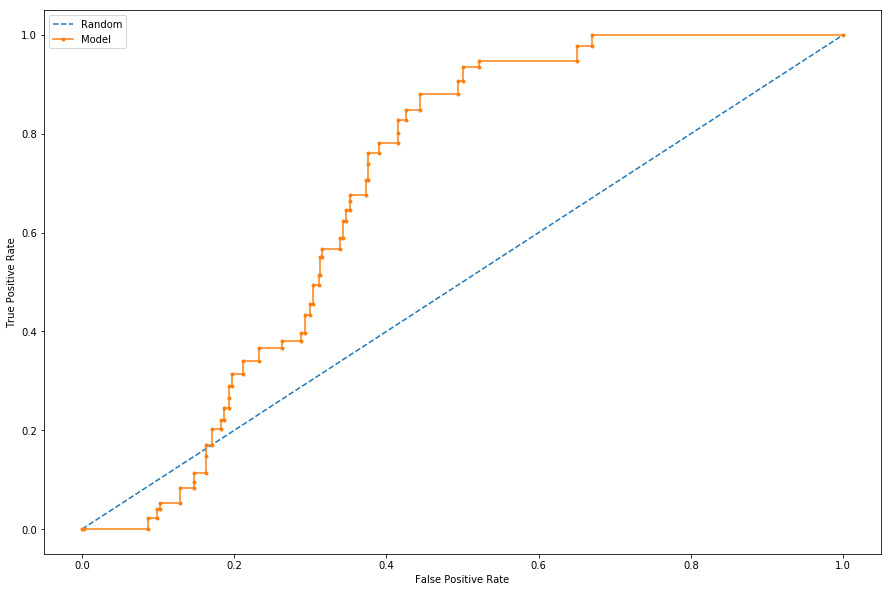

In [467]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

def plotROC(yTest, yPred):
    ns_probs = [0 for _ in range(len(yPred))]
    ns_auc = roc_auc_score(yTest, ns_probs)
    pre_auc = roc_auc_score(yTest, yPred)

    # summarize scores
    print('Random: ROC AUC=%.3f' % (ns_auc))
    print('\nModel: ROC AUC=%.3f' % (pre_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(yTest_, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(yTest_, yPred)
    
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()

plotROC(yTest_, yPred)

In [468]:
model = Sequential()
model.add(LSTM(50, input_shape=(SEQUENCE_LENGTH,NFEATURES)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xTrain_, yTrain_, epochs=50, batch_size=32, verbose=1, validation_data=(xVal_, yVal_))
#yPred = model.predict(xTest_)


Train on 1012 samples, validate on 596 samples
Epoch 1/50
1012/1012 [==============================] - 2s 2ms/step - loss: 0.6420 - acc: 0.6166 - val_loss: 0.9000 - val_acc: 0.3423
Epoch 2/50
1012/1012 [==============================] - 0s 219us/step - loss: 0.5352 - acc: 0.7164 - val_loss: 1.3166 - val_acc: 0.3708
Epoch 3/50
1012/1012 [==============================] - 0s 313us/step - loss: 0.4067 - acc: 0.8350 - val_loss: 1.8902 - val_acc: 0.3926
Epoch 4/50
1012/1012 [==============================] - 1s 522us/step - loss: 0.2651 - acc: 0.8953 - val_loss: 2.3256 - val_acc: 0.3893
Epoch 5/50
1012/1012 [==============================] - 0s 468us/step - loss: 0.1844 - acc: 0.9209 - val_loss: 2.6736 - val_acc: 0.3742
Epoch 6/50
1012/1012 [==============================] - 0s 200us/step - loss: 0.1479 - acc: 0.9387 - val_loss: 2.8046 - val_acc: 0.3557
Epoch 7/50
1012/1012 [==============================] - 0s 259us/step - loss: 0.1026 - acc: 0.9644 - val_loss: 2.7373 - val_acc: 0.3658
Epo

In [488]:
xTrain_.shape[1], xTrain_.shape[2], yTrain_[0]

(6, 51, 1.0)

In [514]:
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.regularizers import l1

# define model
verbose, epochs, batch_size = 0, 25, 128
n_timesteps, n_features, n_outputs = xTrain_.shape[1], xTrain_.shape[2], yTrain_[0]

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features), activity_regularizer=l1(0.0005)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', activity_regularizer=l1(0.0005)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(LSTM(100, activity_regularizer=l1(0.0005)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', activity_regularizer=l1(0.0005)))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', activity_regularizer=l1(0.0005)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
#model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model

In [515]:
model.fit(xTrain_, yTrain_, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(xVal_, yVal_))

Train on 844 samples, validate on 496 samples
Epoch 1/25
844/844 [==============================] - 3s 4ms/step - loss: 9.6313 - acc: 0.4763 - val_loss: 9.1409 - val_acc: 0.4698
Epoch 2/25
844/844 [==============================] - 0s 73us/step - loss: 6.9691 - acc: 0.4810 - val_loss: 7.1023 - val_acc: 0.4657
Epoch 3/25
844/844 [==============================] - 0s 72us/step - loss: 5.3389 - acc: 0.5865 - val_loss: 5.7664 - val_acc: 0.5000
Epoch 4/25
844/844 [==============================] - 0s 71us/step - loss: 4.2232 - acc: 0.5273 - val_loss: 4.8483 - val_acc: 0.5000
Epoch 5/25
844/844 [==============================] - 0s 76us/step - loss: 3.4550 - acc: 0.5071 - val_loss: 4.1940 - val_acc: 0.5000
Epoch 6/25
844/844 [==============================] - 0s 75us/step - loss: 2.8694 - acc: 0.5059 - val_loss: 3.7354 - val_acc: 0.5000
Epoch 7/25
844/844 [==============================] - 0s 77us/step - loss: 2.4599 - acc: 0.5000 - val_loss: 3.3857 - val_acc: 0.5000
Epoch 8/25
844/844 [====

Random: ROC AUC=0.500

Model: ROC AUC=0.500


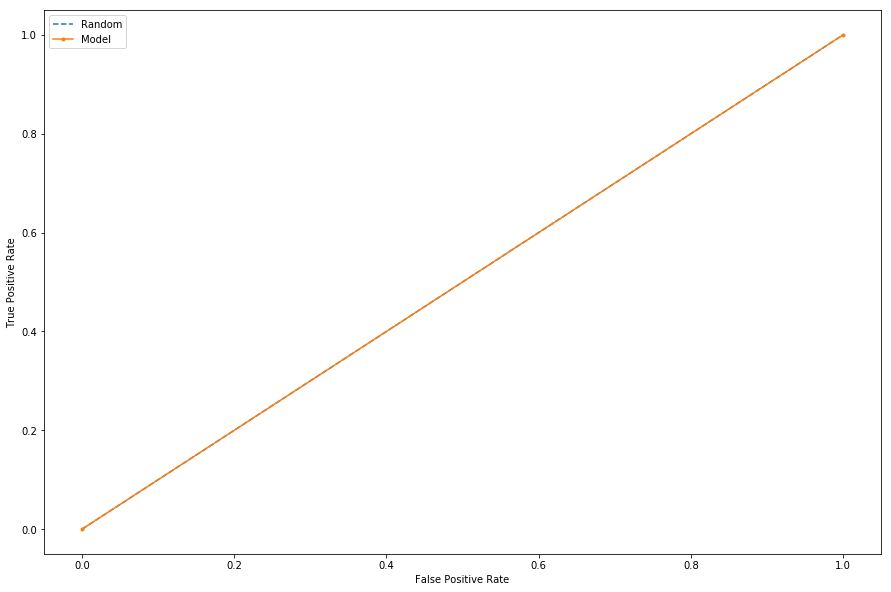

In [516]:
yPred = model.predict(xTest_)
plotROC(yTest_, yPred)

In [517]:
yPred

array([[0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
       [0.5009612],
